The following notebook contains the code for training lstm based model for video data
<br><br>
0: Lie (162 instances) <br>
1: truth (163 instances) <br>
Seq len: 20

In [ ]:
SEQ_LEN = 20
SEED_VAL = 0

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import tensorflow as tf
import keras

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import *
from keras.callbacks import EarlyStopping

# Loading datasets

In [ ]:
FEATURES_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Videos/Version 3/video-cnn-features({}).npz".format(SEQ_LEN)
LABELS_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Videos/Version 3/video-frame-labels({}).npz".format(SEQ_LEN)

In [ ]:
lstm_features = np.load(FEATURES_PATH)["arr_0"]
lstm_labels = np.load(LABELS_PATH)["arr_0"]

In [ ]:
print("Features: {}\nLabels: {}".format(lstm_features.shape, lstm_labels.shape))

Features: (325, 20, 256)
Labels: (325,)


## Train test split

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(lstm_features, lstm_labels, test_size=0.25,
                                                                            random_state=SEED_VAL)

In [ ]:
print("Shapes\nTrain:\nFeatures: {}, labels: {}\n\nTest:\nFeatures:{}, labels: {}".format(
    features_train.shape, labels_train.shape, features_test.shape, labels_test.shape
))

Shapes
Train:
Features: (243, 20, 256), labels: (243,)

Test:
Features:(82, 20, 256), labels: (82,)


# Model

## Callbacks

In [ ]:
LSTM_SAVED_MODEL_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/saved-models/video/Version 3/video-lstm({})".format(SEQ_LEN)

lstm_cbk1 = tf.keras.callbacks.ModelCheckpoint(filepath=LSTM_SAVED_MODEL_PATH,
                                               save_weights_only=False,
                                               monitor="val_loss",
                                               mode="min",
                                               verbose=1,
                                               save_best_only=True)


lstm_cbk2 = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                             patience=25,
                                             verbose=1,
                                             mode="min")

## Building model

In [ ]:
def create_lstm_model() :
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, lstm_features.shape[2])))
    model.add(LSTM(8, return_sequences=False))
    model.add(Dense(1, activation="sigmoid"))


    opt = Adam(learning_rate=0.001)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [ ]:
lstm_model = create_lstm_model()

In [ ]:
lstm_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 20, 128)           197120    
                                                                 
 lstm_16 (LSTM)              (None, 8)                 4384      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201,513
Trainable params: 201,513
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
lstm_history = lstm_model.fit(features_train, labels_train, epochs=50, validation_split=0.2, shuffle=True, callbacks=[lstm_cbk1, lstm_cbk2])

Epoch 1/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6966 - accuracy: 0.4896
Epoch 1: val_loss improved from inf to 0.68343, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/video/Version 3/video-lstm(20)


7/7 [==============================] - 15s 2s/step - loss: 0.6963 - accuracy: 0.4948 - val_loss: 0.6834 - val_accuracy: 0.6122
Epoch 2/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6884 - accuracy: 0.5417
Epoch 2: val_loss improved from 0.68343 to 0.68090, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/video/Version 3/video-lstm(20)


7/7 [==============================] - 10s 2s/step - loss: 0.6881 - accuracy: 0.5412 - val_loss: 0.6809 - val_accuracy: 0.6122
Epoch 3/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6851 - accuracy: 0.5469
Epoch 3: val_loss improved from 0.68090 to 0.67967, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/video/Version 3/video-lstm(20)


7/7 [==============================] - 10s 2s/step - loss: 0.6853 - accuracy: 0.5464 - val_loss: 0.6797 - val_accuracy: 0.6122
Epoch 4/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6831 - accuracy: 0.5469
Epoch 4: val_loss did not improve from 0.67967
7/7 [==============================] - 0s 56ms/step - loss: 0.6841 - accuracy: 0.5412 - val_loss: 0.6806 - val_accuracy: 0.6122
Epoch 5/50
7/7 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.5670
Epoch 5: val_loss did not improve from 0.67967
7/7 [==============================] - 0s 53ms/step - loss: 0.6763 - accuracy: 0.5670 - val_loss: 0.6925 - val_accuracy: 0.4694
Epoch 6/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6723 - accuracy: 0.5260
Epoch 6: val_loss did not improve from 0.67967
7/7 [==============================] - 0s 56ms/step - loss: 0.6739 - accuracy: 0.5206 - val_loss: 0.6908 - val_accuracy: 0.4898
Epoch 7/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6741

7/7 [==============================] - 9s 2s/step - loss: 0.6684 - accuracy: 0.5670 - val_loss: 0.6786 - val_accuracy: 0.4898
Epoch 9/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6679 - accuracy: 0.5625
Epoch 9: val_loss did not improve from 0.67856
7/7 [==============================] - 0s 53ms/step - loss: 0.6681 - accuracy: 0.5619 - val_loss: 0.6900 - val_accuracy: 0.5102
Epoch 10/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6629 - accuracy: 0.5885
Epoch 10: val_loss did not improve from 0.67856
7/7 [==============================] - 0s 55ms/step - loss: 0.6627 - accuracy: 0.5876 - val_loss: 0.6996 - val_accuracy: 0.4898
Epoch 11/50
6/7 [========================>.....] - ETA: 0s - loss: 0.6605 - accuracy: 0.5625
Epoch 11: val_loss did not improve from 0.67856
7/7 [==============================] - 0s 60ms/step - loss: 0.6616 - accuracy: 0.5567 - val_loss: 0.7113 - val_accuracy: 0.4694
Epoch 12/50
7/7 [==============================] - ETA: 0s - loss: 0.

# Evaluations

## Curves

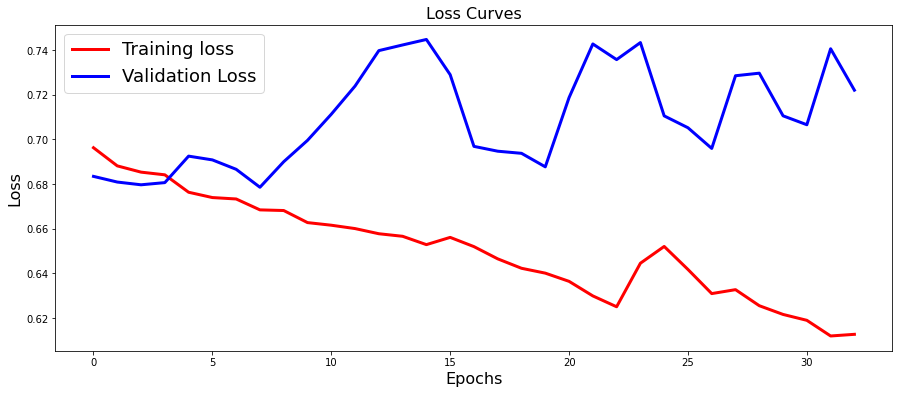

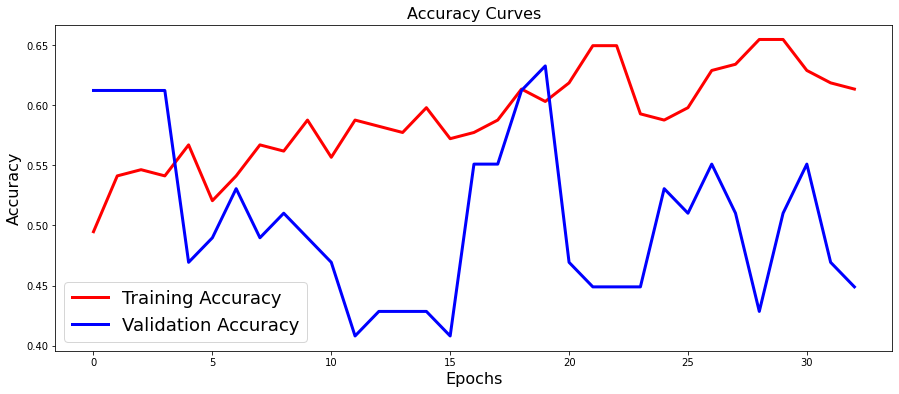

In [ ]:
plt.figure(figsize=[15, 6])
plt.plot(lstm_history.history["loss"], "r", linewidth=3.0)
plt.plot(lstm_history.history["val_loss"], "b", linewidth=3.0)
plt.legend(["Training loss", "Validation Loss"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.title("Loss Curves", fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[15, 6])
plt.plot(lstm_history.history["accuracy"], "r", linewidth=3.0)
plt.plot(lstm_history.history["val_accuracy"], "b", linewidth=3.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy Curves", fontsize=16)
plt.show()

## Test set

In [ ]:
model = load_model(LSTM_SAVED_MODEL_PATH)
model.evaluate(features_test, labels_test)

3/3 [==============================] - 1s 15ms/step - loss: 0.6674 - accuracy: 0.5976


[0.6674126386642456, 0.5975610017776489]

### Confusion matrix

3/3 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

           0       0.79      0.34      0.48        44
           1       0.54      0.89      0.67        38

    accuracy                           0.60        82
   macro avg       0.66      0.62      0.57        82
weighted avg       0.67      0.60      0.57        82



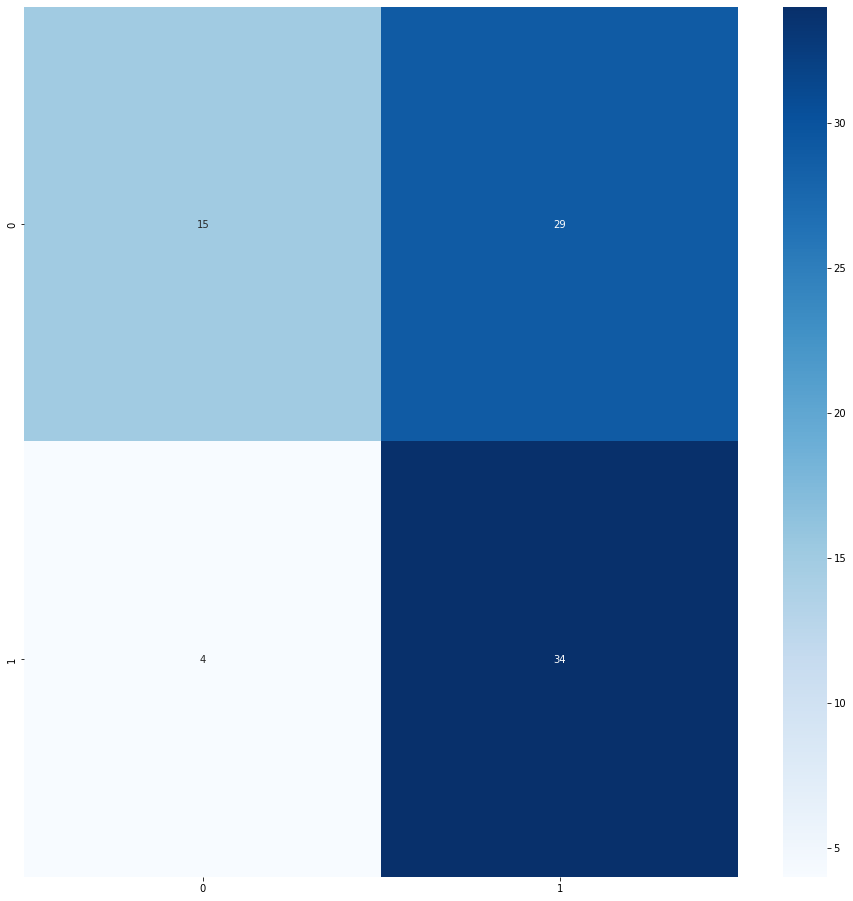

In [ ]:
predicted_classes = np.round(model.predict(features_test))
confusionmatrix = confusion_matrix(labels_test, predicted_classes)
plt.figure(figsize=(16, 16))
sns.heatmap(confusionmatrix, cmap="Blues", annot=True, cbar=True)
print(classification_report(labels_test, predicted_classes))

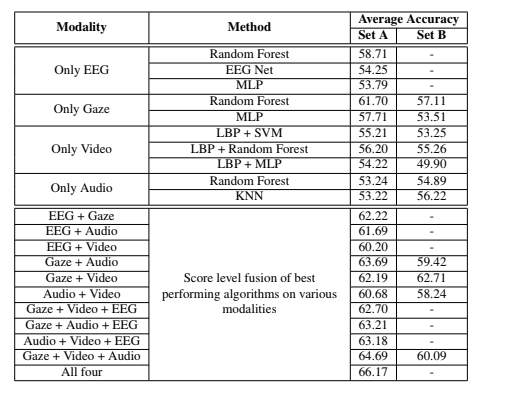

# Extracting features

In [ ]:
model = load_model(LSTM_SAVED_MODEL_PATH)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 20, 128)           197120    
                                                                 
 lstm_16 (LSTM)              (None, 8)                 4384      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201,513
Trainable params: 201,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(features_test, labels_test)

3/3 [==============================] - 1s 19ms/step - loss: 0.6674 - accuracy: 0.5976


[0.6674126386642456, 0.5975610017776489]

In [ ]:
model_outputs = model.get_layer("lstm_16").output
child_model = tf.keras.models.Model(inputs=model.inputs, outputs=model_outputs)

In [ ]:
gen_model_output = child_model.predict(lstm_features)

11/11 [==============================] - 1s 34ms/step


In [ ]:
gen_model_output.shape

(325, 8)

In [ ]:
OUTPUT_SAVE_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/Videos/Version 3/video-lstm({})-generated-output".format(SEQ_LEN)
np.savez_compressed(OUTPUT_SAVE_PATH, gen_model_output)